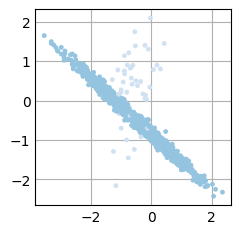

In [5]:

# Tratamiento de datos
# ==============================================================================
import numpy as np
import pandas as pd
import string
import re
# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns


# Preprocesado y modelado
# ==============================================================================
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer

# Configuración warnings
# ==============================================================================
from sklearn.datasets import make_classification
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, PowerTransformer
from sklearn.impute import SimpleImputer, KNNImputer

from sklearn.feature_selection import SelectKBest, chi2, RFE
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.decomposition import PCA

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score

from sklearn.model_selection import KFold, ShuffleSplit, LeaveOneOut, StratifiedKFold
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

########### hacemos clasificacion con SVM ####
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score



X, y = make_classification(n_classes=2, class_sep=0.5,
weights=[0.05, 0.95], n_informative=2, n_redundant=0, flip_y=0,
n_features=2, n_clusters_per_class=1, n_samples=1000, random_state=10)

plt.style.use('_mpl-gallery')
fig, ax = plt.subplots()

ax.scatter(X[:,0],X[:,1], s=6, c=y+1, vmin=0, vmax=5)


0
1    287
0     13
Name: count, dtype: int64

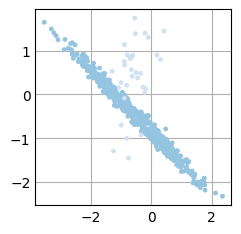

In [6]:

[X_train, X_test, y_train, y_test] = train_test_split(X, y, test_size = 0.30, random_state = 101)
### DIBUJAMOS
plt.style.use('_mpl-gallery')
fig, ax = plt.subplots()
ax.scatter(X_train[:,0],X_train[:,1], s=6,  c=y_train+1, vmin=0, vmax=5)
##

pd.DataFrame(y_test).describe()
pd.DataFrame(y_test).value_counts()

In [7]:
from sklearn import svm

# train the model on train set
model = svm.SVC(kernel='linear')
model.fit(X_train, y_train)

# print prediction results
predictions = model.predict(X_test)
print(classification_report(y_test, predictions))

cm = confusion_matrix(y_test, predictions)
print(cm)
accuracy=(cm[0,0]+cm[1,1])/(cm[0,1]+cm[1,1]+ cm[1,0]+cm[0,0])
print('accuracy' , accuracy)


              precision    recall  f1-score   support

           0       1.00      0.46      0.63        13
           1       0.98      1.00      0.99       287

    accuracy                           0.98       300
   macro avg       0.99      0.73      0.81       300
weighted avg       0.98      0.98      0.97       300

[[  6   7]
 [  0 287]]
accuracy 0.9766666666666667


In [9]:

# definimos los rangos de los parametros
param_grid_lineal = {'C': [0.1, 0.2, 0.3, 0.4, 0.5, 1, 2, 5, 10, 100, 1000] }
grid = GridSearchCV(SVC(kernel='linear'), param_grid_lineal, refit = True, cv=10, verbose = 1)

# ENTRENAMOS EN TRAIN Y BUSCAMOS EN TRAIN
resultados = grid.fit(X_train, y_train)

#############################

grid_predictions = grid.predict(X_test)

# print classification report
print(classification_report(y_test, grid_predictions))
cm = confusion_matrix(y_test, grid_predictions)
print(cm)
accuracy=(cm[0,0]+cm[1,1])/(cm[0,1]+cm[1,1]+ cm[1,0]+cm[0,0])
print('accuracy' , accuracy)

Fitting 10 folds for each of 11 candidates, totalling 110 fits
              precision    recall  f1-score   support

           0       1.00      0.46      0.63        13
           1       0.98      1.00      0.99       287

    accuracy                           0.98       300
   macro avg       0.99      0.73      0.81       300
weighted avg       0.98      0.98      0.97       300

[[  6   7]
 [  0 287]]
accuracy 0.9766666666666667


In [11]:

from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)


pd.DataFrame(y_res).describe()
pd.DataFrame(y_res).value_counts()


0
0    663
1    663
Name: count, dtype: int64

In [12]:



model = SVC(kernel='linear')
model.fit(X_res, y_res)

# print prediction results
predictions = model.predict(X_test)
print(classification_report(y_test, predictions))

cm = confusion_matrix(y_test, predictions)
print(cm)
accuracy=(cm[0,0]+cm[1,1])/(cm[0,1]+cm[1,1]+ cm[1,0]+cm[0,0])
print('accuracy' , accuracy)

              precision    recall  f1-score   support

           0       1.00      0.54      0.70        13
           1       0.98      1.00      0.99       287

    accuracy                           0.98       300
   macro avg       0.99      0.77      0.84       300
weighted avg       0.98      0.98      0.98       300

[[  7   6]
 [  0 287]]
accuracy 0.98


In [16]:

# definimos los rangos de los parametros
param_grid_lineal = {'C': [0.1, 0.2, 0.3, 0.4, 0.5, 1, 2, 5, 10, 100, 1000] }
grid = GridSearchCV(SVC(kernel='linear'), param_grid_lineal, scoring='precision', refit = True, cv=5, verbose = 1)


# ENTRENAMOS EN TRAIN Y BUSCAMOS EN TRAIN
resultados = grid.fit(X_res, y_res)

#############################

grid_predictions = grid.predict(X_test)

# print classification report
print(classification_report(y_test, grid_predictions))
cm = confusion_matrix(y_test, grid_predictions)
print(cm)
accuracy=(cm[0,0]+cm[1,1])/(cm[0,1]+cm[1,1]+ cm[1,0]+cm[0,0])
print('accuracy' , accuracy)

Fitting 5 folds for each of 11 candidates, totalling 55 fits
              precision    recall  f1-score   support

           0       1.00      0.54      0.70        13
           1       0.98      1.00      0.99       287

    accuracy                           0.98       300
   macro avg       0.99      0.77      0.84       300
weighted avg       0.98      0.98      0.98       300

[[  7   6]
 [  0 287]]
accuracy 0.98
